<h2 style="color:green" align="center">Predicting if a person would buy life insurnace based on his age using logistic regression</h2>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


### To see the data distribution i use scatter plot

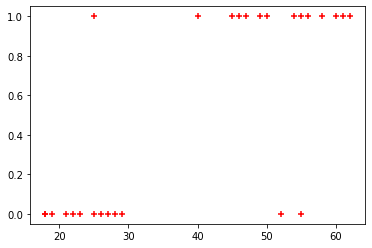

In [5]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

As you can see here the person who are younger is less likely to buy insurance and as the person is more older he/she is most likely to have insurance

### Use Train Test Split method to split our dataset

In [7]:
# to check the size of dataset
df.shape

(27, 2)

we have 27 rows so we are going to split these rows into training set and test set

In [8]:
# To do this we have sklearn model selection from this  we need to import train test split method.

from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9)

In [11]:
X_test


,age
24,50
25,54
2,47


In [13]:
X_train


,age
3,52
22,40
1,25
20,21
13,29
7,60
6,55
19,18
10,18
5,56


Let's now import logistic regression from same sklearn.linear_model

In [16]:
from sklearn.linear_model import LogisticRegression

Creating object of this class we will called it a model

In [17]:
model = LogisticRegression()

In [20]:
# when ever we are using fit method actually we are doing training for our model

model.fit(X_train, y_train)

LogisticRegression()

Now this means that your model is trained its ready to make prediction 

Lets predict the X_test values

In [23]:
X_test


,age
24,50
25,54
2,47


In [24]:
model.predict(X_test)  


array([1, 1, 1], dtype=int64)

model.score() will show the accuracy of your model

In [25]:
model.score(X_test,y_test)

1.0

score is 100% because of the less dataset the score is pitty high here in this case 

In [26]:
# to see the probability of test

model.predict_proba(X_test)

array([[0.23385732, 0.76614268],
       [0.15666919, 0.84333081],
       [0.30698919, 0.69301081]])


First class will tell you customer will probably not buy the insurance like 0.2,0.1,0.3
second class will show you customer will probably buy insurance as it is 0.7,0.8,0.6


### Predicting individual value

In [29]:
model.predict([[23]])

array([0], dtype=int64)

In [30]:
model.predict([[50]])

array([1], dtype=int64)

In [32]:
y_predicted = model.predict(X_test)

In [33]:
y_predicted

array([1, 1, 1], dtype=int64)

### model.coef_ indicates value of m in y=m*x + b equation

In [34]:
model.coef_

array([[0.12414139]])

### model.intercept_ indicates value of b in y=m*x + b equation

In [35]:
model.intercept_

array([-5.02041211])

### Lets defined sigmoid function now and do the math with hand

In [36]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [38]:
def prediction_function(age):
    z = 0.124 * age -5.02 # 0.12414139 ~ 0.124 and -5.02041211 ~ -5.02
    y = sigmoid(z)
    return y

In [39]:
age = 35
prediction_function(age)

0.3362613025956474

0.336 is less than 0.5 which means person with 35 age will not buy insurance

In [41]:
model.predict([[35]]) # cross check with our model as well

array([0], dtype=int64)

In [42]:
age = 43
prediction_function(age)

0.5773733632268729

0.577 is more than 0.5 which means person with 43 age will  buy insurance

<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics. 
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model